In [4]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("../../")

In [6]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_pickle('../../datos/modelo2/datos_preprocesados.pkl')

In [9]:
df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,...,Education_5.0,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,0.0,0.0,-0.943914735491662,1.0,1.153846,0.0,-1.0,-0.083333,0.0,-0.9450964102808177,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.056085264508337944,1.272172521742468,-0.384615,0.11333267018127957,0.0,0.250000,0.0,0.45135028949859385,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.505837150879456,0.056085264508337944,5.867264232325414,-0.307692,0.11333267018127957,0.0,0.833333,-5.396956951550586,0.05490358971918225,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.4941628491205439,-0.943914735491662,0.0,0.153846,-0.07045481309786648,0.0,-0.416667,0.0,-1.5957948681964722,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,-0.4941628491205439,1.2512174887022243,0.0,-0.307692,0.0,0.0,0.250000,0.07620631831817355,0.05490358971918225,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df = df.astype(float)

### REGRESIÓN

In [11]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = logistica.calcular_metricas(modelo_nombre = "logistic_regression")
df_resultados_regresion["modelo"] = "logistic_regression"
df_resultados_regresion

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.864366,0.842966,0.864366,0.831259,0.253543,0.812105,0.001994,NaN,NaN,NaN,logistic_regression
test,0.849359,0.833113,0.849359,0.819942,0.323367,0.831124,NaN,NaN,0.001994,NaN,logistic_regression


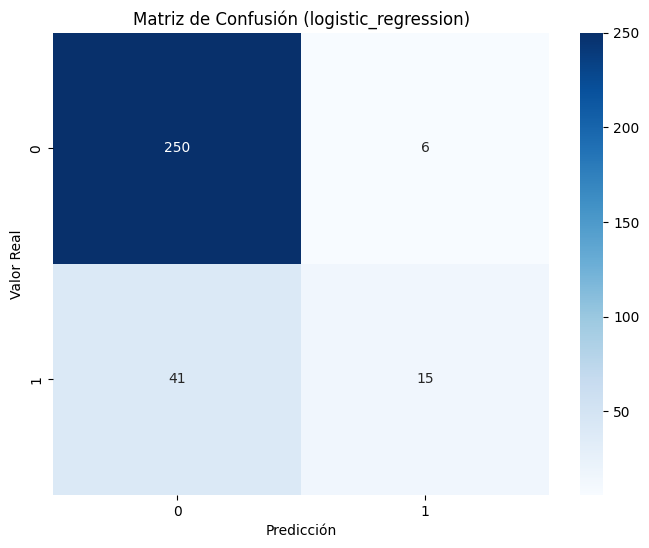

In [12]:
logistica.plot_matriz_confusion("logistic_regression")

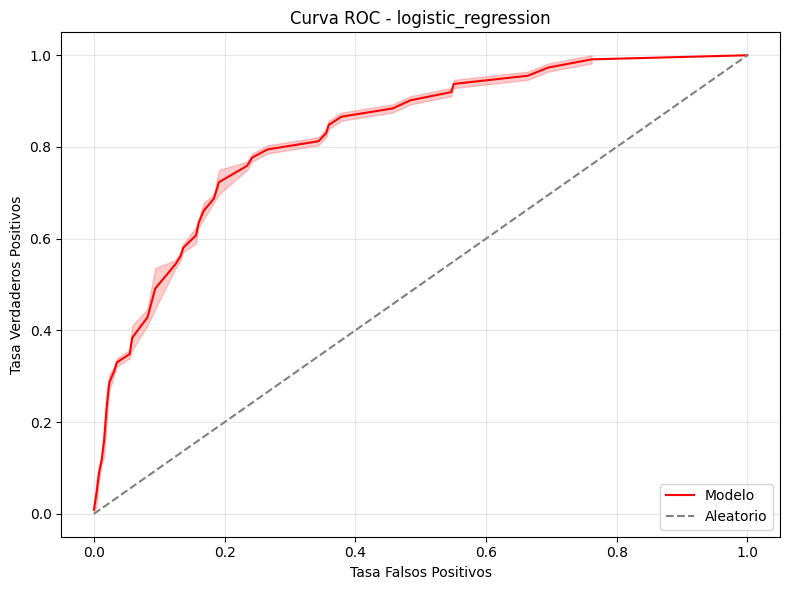

In [13]:
logistica.plot_curva_roc("logistic_regression")

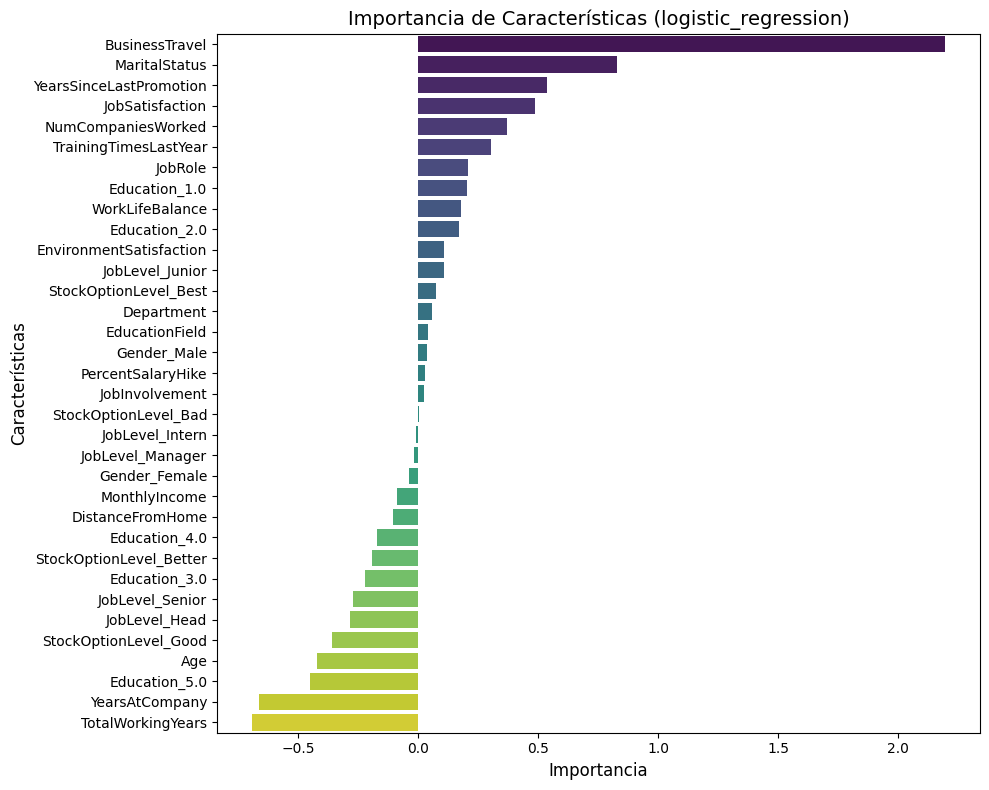

In [14]:
logistica.importancia_predictores("logistic_regression")

### DECISION TREE

In [15]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre = "tree")
df_resultados_tree["modelo"] = "tree"
df_resultados_tree 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.861958,0.839706,0.861958,0.824414,0.218604,0.693877,0.001996,4.0,NaN,NaN,tree
test,0.836538,0.810656,0.836538,0.801726,0.251974,0.683071,NaN,NaN,0.001996,4.0,tree


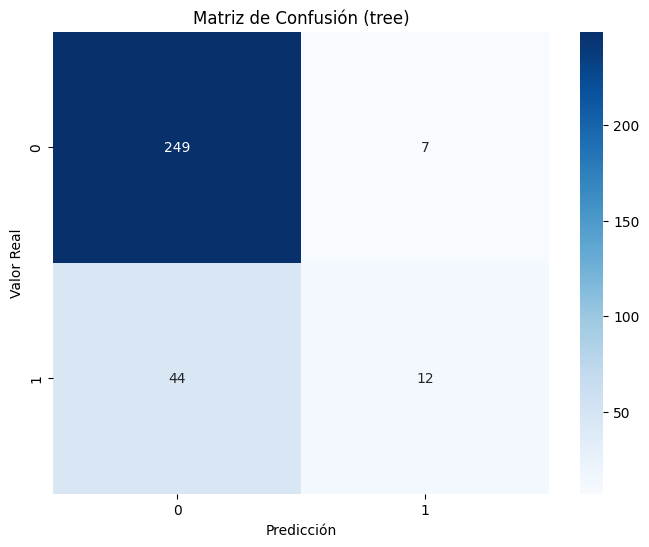

In [16]:
logistica.plot_matriz_confusion("tree")

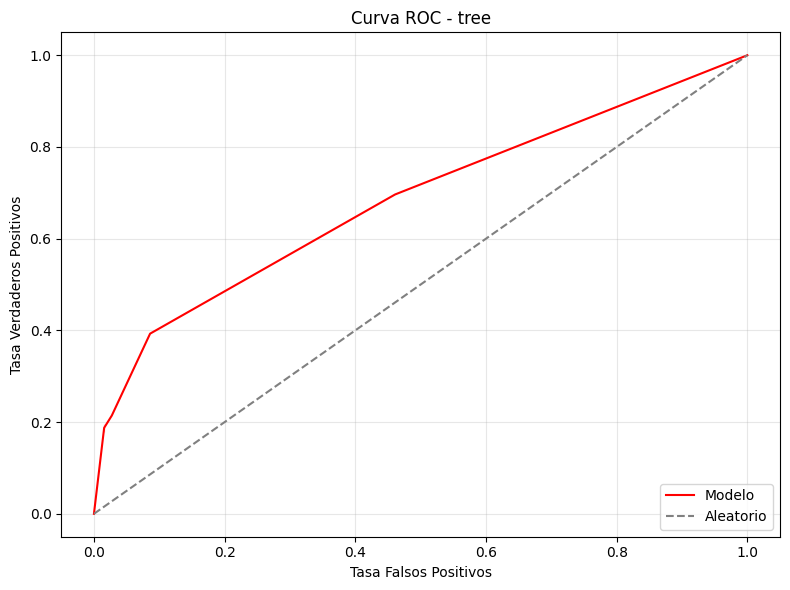

In [17]:
logistica.plot_curva_roc("tree")

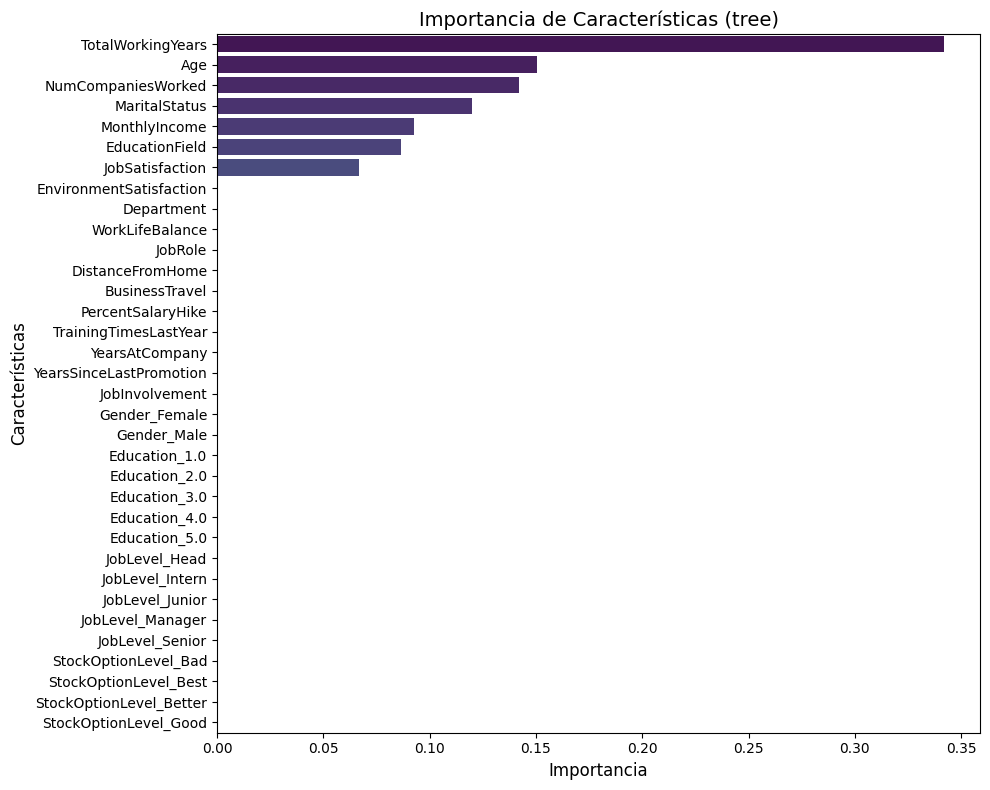

In [18]:
logistica.importancia_predictores("tree")

### RANDOM FOREST

In [19]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_rf = logistica.calcular_metricas(modelo_nombre = "random_forest")
df_resultados_rf["modelo"] = "random_forest"
df_resultados_rf 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
El mejor modelo es RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                       random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999197,0.999198,0.999197,0.999197,0.996861,1.000000,0.059839,-1.0,NaN,NaN,random_forest
test,0.858974,0.861140,0.858974,0.824910,0.335913,0.824079,NaN,NaN,0.059839,-1.0,random_forest


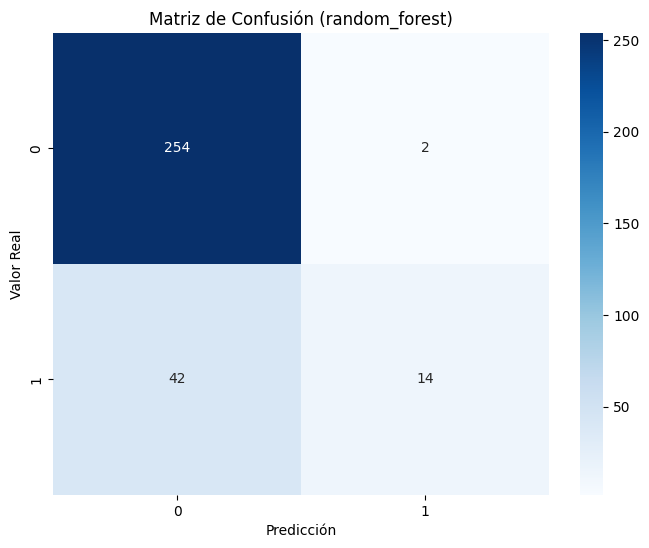

In [20]:
logistica.plot_matriz_confusion("random_forest")

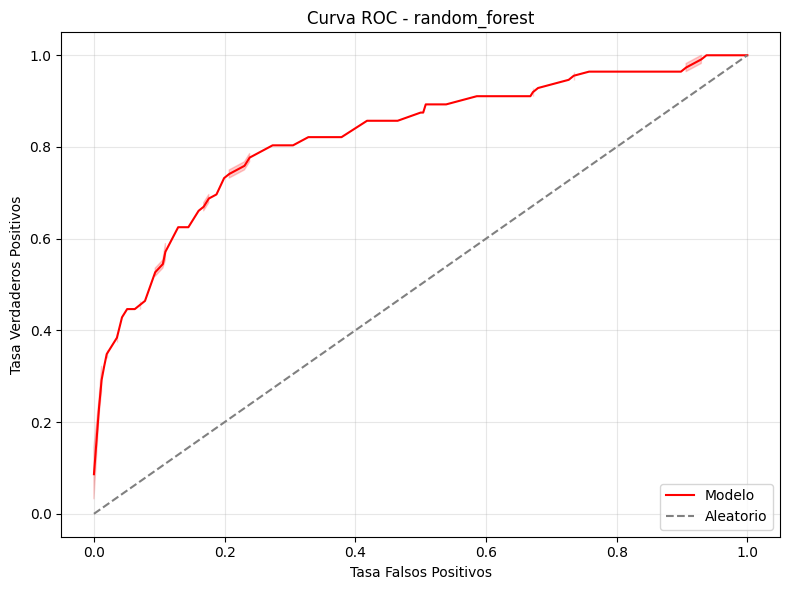

In [21]:
logistica.plot_curva_roc("random_forest")

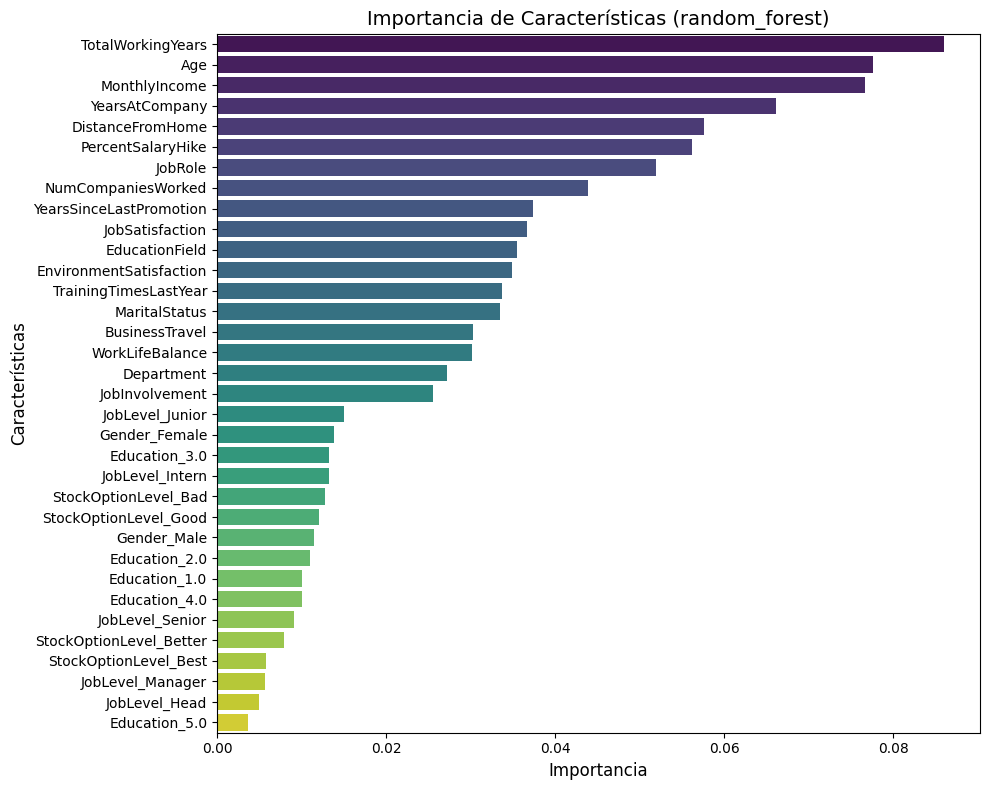

In [22]:
logistica.importancia_predictores("random_forest")

### Gradient Boosting

In [23]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gb = logistica.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados_gb["modelo"] = "gradient_boosting"
df_resultados_gb 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.02, max_depth=4, min_samples_leaf=10,
                           min_samples_split=5, n_estimators=150,
                           random_state=42, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.892456,0.898666,0.892456,0.867770,0.417123,0.943053,0.017952,4.0,NaN,NaN,gradient_boosting
test,0.852564,0.842898,0.852564,0.819802,0.318907,0.834473,NaN,NaN,0.017952,4.0,gradient_boosting


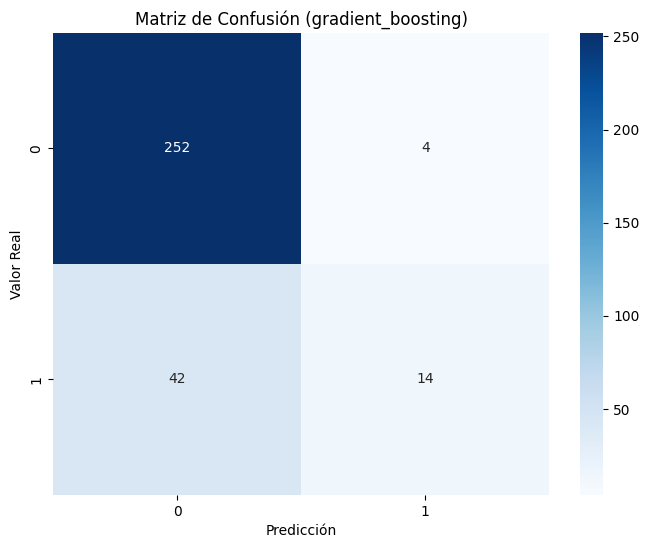

In [24]:
logistica.plot_matriz_confusion("gradient_boosting")

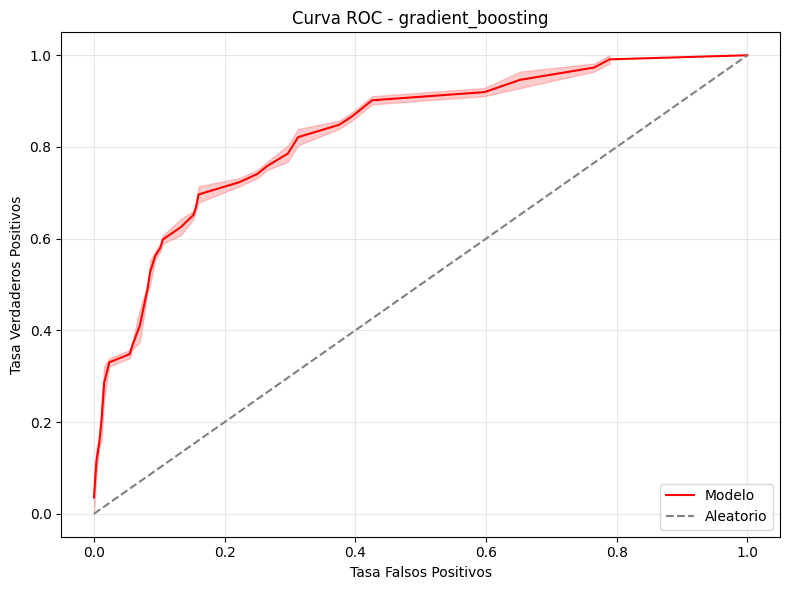

In [25]:
logistica.plot_curva_roc("gradient_boosting")

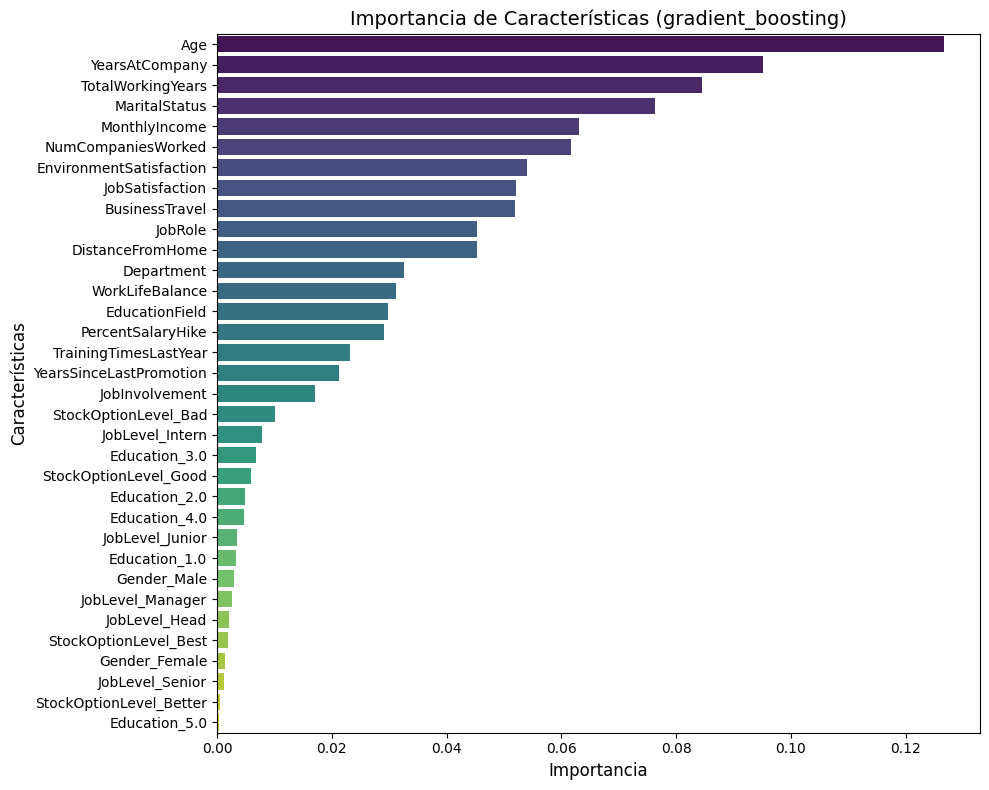

In [26]:
logistica.importancia_predictores("gradient_boosting")

In [27]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xg = logistica.calcular_metricas(modelo_nombre = "xgboost")
df_resultados_xg["modelo"] = "xgboost"
df_resultados_xg 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.03391,NaN,NaN,NaN,xgboost
test,0.858974,0.844709,0.858974,0.839126,0.404993,0.810059,NaN,NaN,0.03391,NaN,xgboost


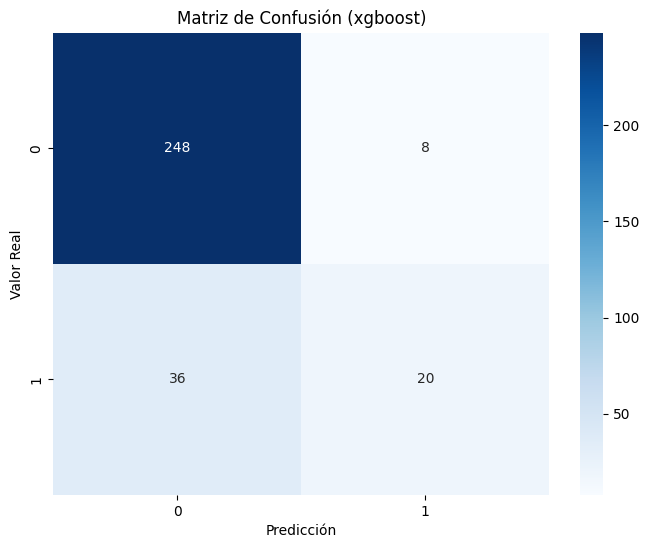

In [28]:
logistica.plot_matriz_confusion("xgboost")

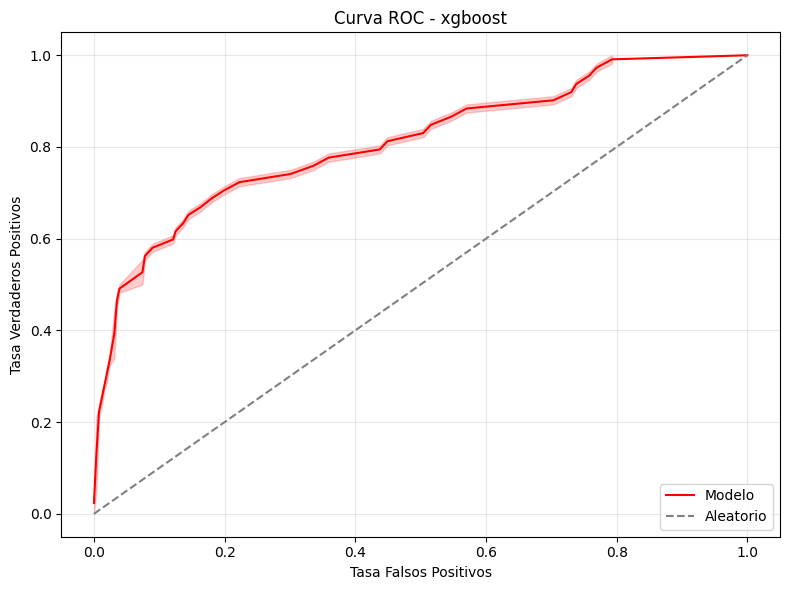

In [29]:
logistica.plot_curva_roc("xgboost")

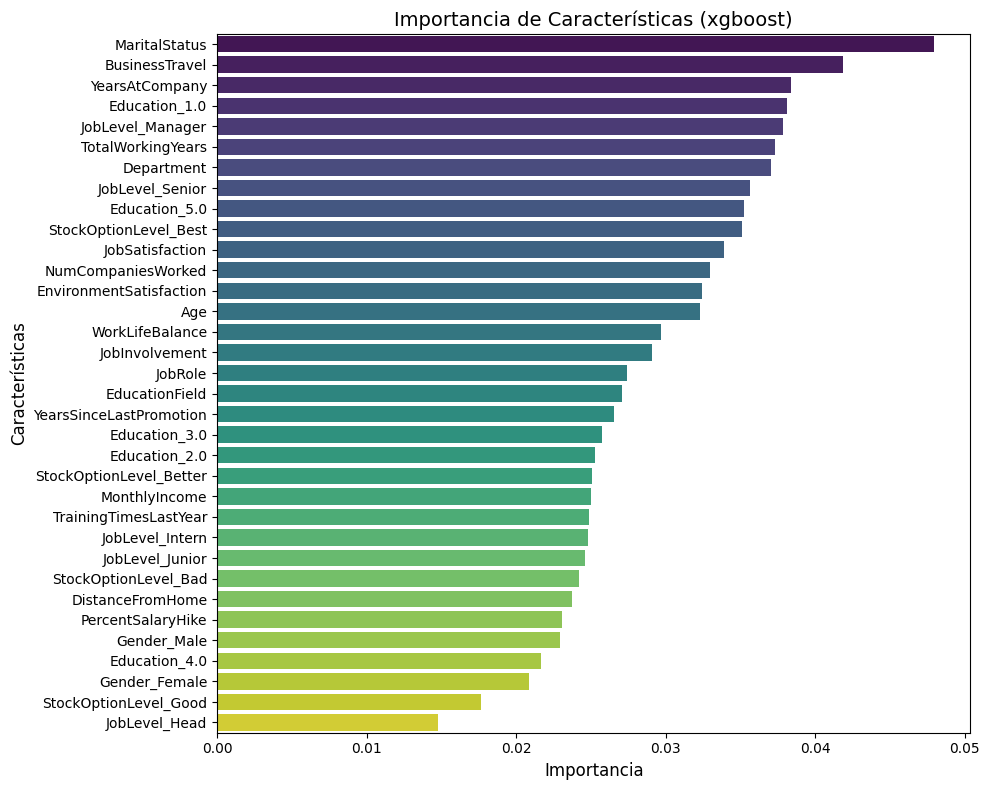

In [30]:
logistica.importancia_predictores("xgboost")

## CONCLUSIONES

In [31]:
df_resultados = pd.concat([df_resultados_regresion, df_resultados_tree, df_resultados_rf, df_resultados_gb, df_resultados_xg])
df_resultados.reset_index(drop=True, inplace=True)
df_resultados = df_resultados.drop(columns=["n_jobs", "nucleos_usados","time_seconds","tiempo_computacion(segundos)"])
df_resultados

,accuracy,precision,recall,f1,kappa,auc,modelo
0,0.864366,0.842966,0.864366,0.831259,0.253543,0.812105,logistic_regression
1,0.849359,0.833113,0.849359,0.819942,0.323367,0.831124,logistic_regression
2,0.861958,0.839706,0.861958,0.824414,0.218604,0.693877,tree
3,0.836538,0.810656,0.836538,0.801726,0.251974,0.683071,tree
4,0.999197,0.999198,0.999197,0.999197,0.996861,1.000000,random_forest
5,0.858974,0.861140,0.858974,0.824910,0.335913,0.824079,random_forest
6,0.892456,0.898666,0.892456,0.867770,0.417123,0.943053,gradient_boosting
7,0.852564,0.842898,0.852564,0.819802,0.318907,0.834473,gradient_boosting
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
9,0.858974,0.844709,0.858974,0.839126,0.404993,0.810059,xgboost


Este modelo empeora al 1 en todas las métricas, especialmente en la kappa. Puede ser, que al haber quitado un gran numero de duplicados, los datos se han reducido mucho, y eso hace que se acuse mucho más el desbalanceo. Los "No" de la columna Attrition son demasiado pocos para poder entrenar un modelo y predecirlos. En el siguiente modelo, tratamos el desbalanceo.